In [3]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.6 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df_temperatura = pd.read_csv('/Users/paoguti/Proyecto-Meteorologico/notebooks/datasets/temperatura.csv')
df_humedad = pd.read_csv('/Users/paoguti/Proyecto-Meteorologico/notebooks/datasets/humedad.csv')
df_lluvias = pd.read_csv('/Users/paoguti/Proyecto-Meteorologico/notebooks/datasets/lluvias.csv')
df_viento = pd.read_csv('/Users/paoguti/Proyecto-Meteorologico/notebooks/datasets/viento.csv')

In [71]:
df_temperatura.head()

,fecha,provincia,indicativo,tmed,tmin,horatmin,tmax,horatmax,timestamp
0,2023-02-14,STA. CRUZ DE TENERIFE,C453I,5.2,3.5,19:00:00,6.8,03:00:00,2025-02-13 03:30:00
1,2023-02-14,MURCIA,7250C,11.0,8.2,05:55:00,13.8,12:52:00,2025-02-13 03:30:00
2,2023-02-14,SEVILLA,5612B,11.8,7.0,04:40:00,16.7,14:00:00,2025-02-13 03:30:00
3,2023-02-14,ZAMORA,2885K,5.7,-1.8,06:35:00,13.2,14:53:00,2025-02-13 03:30:00
4,2023-02-14,CASTELLON,8492X,5.7,-0.9,02:16:00,12.3,12:31:00,2025-02-13 03:30:00


In [72]:
# Filtrar los datos por año
df_temperatura['fecha'] = pd.to_datetime(df_temperatura['fecha'])
df_temperatura['año'] = df_temperatura['fecha'].dt.year

In [74]:
# Agrupar por provincia y año
df_temperatura_agrupada = df_temperatura.groupby(['provincia', 'año'])

# Calcular estadísticas para tmed, tmin y tmax por provincia y año
def calcular_estadisticas(grupo):
    return {
        'min_tmed': grupo['tmed'].min(),
        'media_tmed': grupo['tmed'].mean(),
        'mediana_tmed': grupo['tmed'].median(),
        'max_tmed': grupo['tmed'].max(),
        'min_tmin': grupo['tmin'].min(),
        'media_tmin': grupo['tmin'].mean(),
        'mediana_tmin': grupo['tmin'].median(),
        'max_tmin': grupo['tmin'].max(),
        'min_tmax': grupo['tmax'].min(),
        'media_tmax': grupo['tmax'].mean(),
        'mediana_tmax': grupo['tmax'].median(),
        'max_tmax': grupo['tmax'].max()
    }


In [ ]:
# Aplicar la función a cada grupo (provincia, año)
estadisticas = df_temperatura_agrupada.apply(calcular_estadisticas)

# Convertir el resultado de la función (que es un diccionario) en columnas separadas
estadisticas_reset = pd.DataFrame(estadisticas.tolist(), index=estadisticas.index)

estadisticas_reset = estadisticas_reset.reset_index()

print(estadisticas_reset.head())

  provincia   año  min_tmed  media_tmed  mediana_tmed  max_tmed  min_tmin  \
0  A CORUÑA  2023       1.2   15.825559          16.2      30.0      -5.6   
1  A CORUÑA  2024       1.2   14.691528          14.8      29.4      -3.4   
2  A CORUÑA  2025       2.8   10.404155          10.4      16.7      -4.7   
3  ALBACETE  2023      -2.5   17.192494          17.0      33.7     -10.4   
4  ALBACETE  2024      -1.4   16.248377          15.7      34.8      -7.9   

   media_tmin  mediana_tmin  max_tmin  min_tmax  media_tmax  mediana_tmax  \
0   11.637143          12.3      22.5       5.3   20.014366          20.1   
1   10.754572          11.1      21.9       4.0   18.630629          18.4   
2    6.966524           7.5      15.1       7.2   13.836103          13.9   
3   10.005464          10.3      25.9       0.2   24.378808          24.1   
4    9.670130           9.5      27.2       1.7   22.827505          22.1   

   max_tmax  
0      39.1  
1      37.3  
2      19.5  
3      44.5  
4   

/var/folders/6g/v9kkgspj6ts58fy6y_q2zd2h0000gn/T/ipykernel_76487/969594670.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  estadisticas = df_temperatura_agrupada.apply(calcular_estadisticas)


In [80]:
# Graficar las estadísticas para un ejemplo de provincia
provincia_elegida = 'A CORUÑA'  # Cambia a la provincia que deseas

# Filtrar las estadísticas para esa provincia
estadisticas_provincia = estadisticas_reset[estadisticas_reset['provincia'] == provincia_elegida]

In [81]:
print(estadisticas_provincia.head())

  provincia   año  min_tmed  media_tmed  mediana_tmed  max_tmed  min_tmin  \
0  A CORUÑA  2023       1.2   15.825559          16.2      30.0      -5.6   
1  A CORUÑA  2024       1.2   14.691528          14.8      29.4      -3.4   
2  A CORUÑA  2025       2.8   10.404155          10.4      16.7      -4.7   

   media_tmin  mediana_tmin  max_tmin  min_tmax  media_tmax  mediana_tmax  \
0   11.637143          12.3      22.5       5.3   20.014366          20.1   
1   10.754572          11.1      21.9       4.0   18.630629          18.4   
2    6.966524           7.5      15.1       7.2   13.836103          13.9   

   max_tmax  
0      39.1  
1      37.3  
2      19.5  


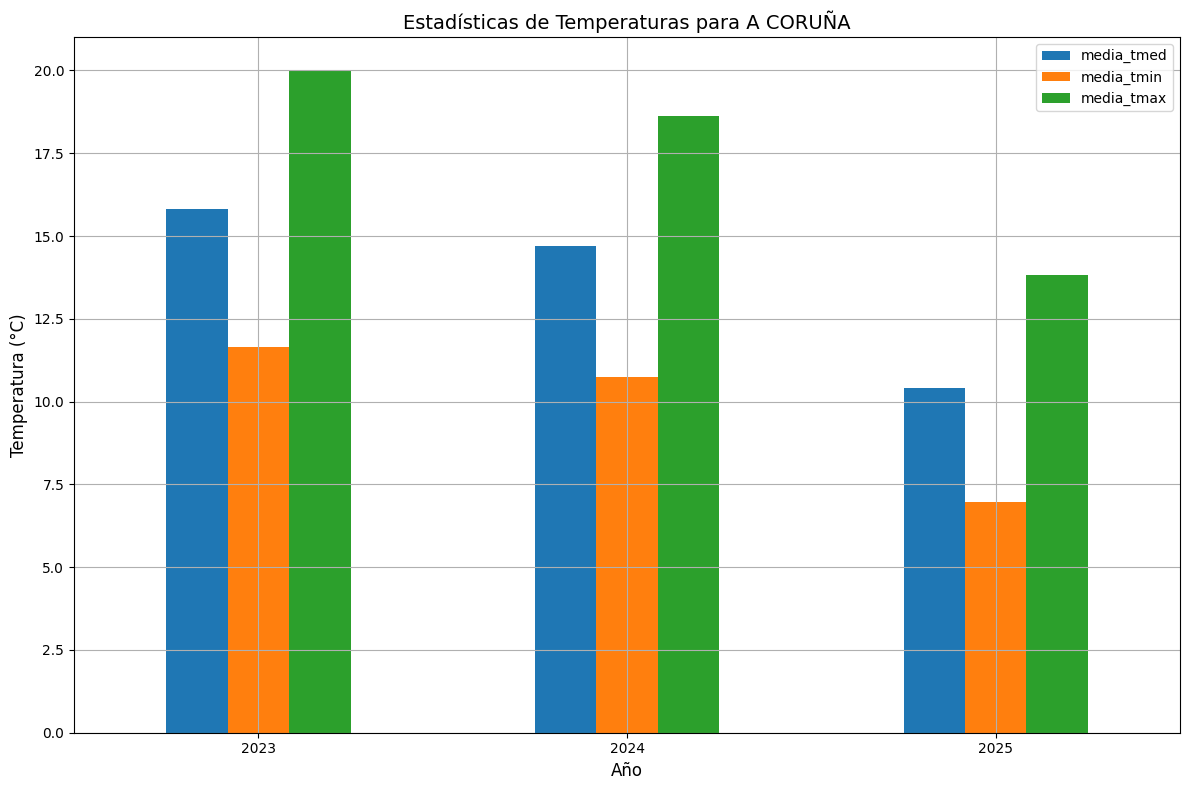

In [85]:
# Graficar
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar las estadísticas para cada tipo de temperatura (tmed, tmin, tmax)
estadisticas_provincia[['media_tmed', 'media_tmin', 'media_tmax']].plot(kind='bar', ax=ax)

ax.set_title(f'Estadísticas de Temperaturas para {provincia_elegida}', fontsize=14)
ax.set_ylabel('Temperatura (°C)', fontsize=12)
ax.set_xlabel('Año', fontsize=12)
ax.grid(True)

# Ajustar las etiquetas del eje X para mostrar los años
ax.set_xticklabels([2023, 2024, 2025], rotation=0)∫

# Mostrar el gráfico
plt.tight_layout()
plt.show()